<a href="https://qiita.com/maskot1977/items/e4f5f71200180865986e">カーブフィッティング手法 scipy.optimize.curve_fit の使い方を理解する</a> では、様々な曲線に近似する方法を学びました。それでは、次のように、y が０か１しかない場合にはどんな曲線に近似すれば良いでしょうか？

In [1]:
X1 = [4.7, 4.5, 4.9, 4.0, 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 
      3.5, 4.2, 4.0, 4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 
      4.8, 4.0, 4.9, 4.7, 4.3, 4.4, 4.8, 5.0, 4.5, 3.5, 
      3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4.0, 
      4.4, 4.6, 4.0, 3.3, 4.2, 4.2, 4.2, 4.3, 3.0, 4.1, 
      6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 
      5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 
      5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 
      6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 
      5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]

Y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

とりあえずデータを図示してみましょう。

/Users/kot/miniconda3/envs/py3new/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


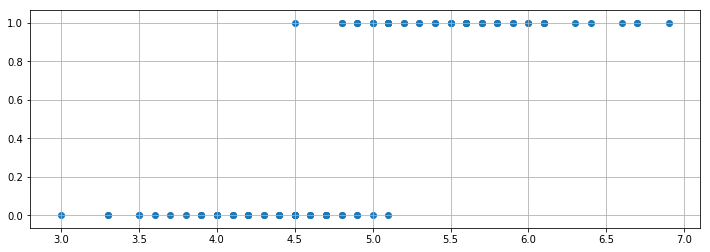

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.scatter(X1, Y)
plt.grid()
plt.show()

このような関係を近似するときに、シグモイド曲線に近似する「ロジスティック回帰」を使います。scipy.optimize.curve_fit で実装してみましょう。


In [3]:
# Python の List を Numpy の Array に変換しておきましょう。
import numpy as np
X1 = np.array(X1)
Y = np.array(Y)

# 説明変数が１つのシグモイド曲線に近似する

説明変数が１つのシグモイド曲線 func1 を定義します。a と b を最適化することになります。

In [5]:
import numpy as np
def func1(X, a, b): # シグモイド曲線
    f = a + b * X
    return 1. / (1. + np.exp(-f))

func1 の使用例はこんな感じ。

In [38]:
func1(X1, 1, 1)

array([0.99666519, 0.99592986, 0.99726804, 0.99330715, 0.99631576,
       0.99592986, 0.99666519, 0.98661308, 0.99631576, 0.99260846,
       0.98901306, 0.9945137 , 0.99330715, 0.99666519, 0.9900482 ,
       0.99550373, 0.99592986, 0.9939402 , 0.99592986, 0.99260846,
       0.99698158, 0.99330715, 0.99726804, 0.99666519, 0.9950332 ,
       0.99550373, 0.99698158, 0.99752738, 0.99592986, 0.98901306,
       0.99183743, 0.9909867 , 0.99260846, 0.99776215, 0.99592986,
       0.99592986, 0.99666519, 0.99550373, 0.9939402 , 0.99330715,
       0.99550373, 0.99631576, 0.99330715, 0.98661308, 0.9945137 ,
       0.9945137 , 0.9945137 , 0.9950332 , 0.98201379, 0.9939402 ,
       0.99908895, 0.99776215, 0.99899323, 0.99864148, 0.99888746,
       0.9994998 , 0.99592986, 0.99932492, 0.99888746, 0.99917558,
       0.99776215, 0.99816706, 0.99849882, 0.99752738, 0.99776215,
       0.99816706, 0.99849882, 0.99954738, 0.99962939, 0.99752738,
       0.9987706 , 0.99726804, 0.99954738, 0.99726804, 0.99877

scipy.optimize.curve_fit を使って、a と b の最適解を得ます。scipy.optimize.curve_fit の詳細は <a href="https://qiita.com/maskot1977/items/e4f5f71200180865986e">カーブフィッティング手法 scipy.optimize.curve_fit の使い方を理解する</a>  をご参考に。

In [7]:
from scipy.optimize import curve_fit  
popt, pcov = curve_fit(func1,X1,Y) # poptは最適推定値、pcovは共分散
popt

array([-47.16056308,   9.69474387])

これが a と b の最適解になります。この最適解を用いて X1 をシグモイド曲線に回帰すると

In [8]:
func1(X1, -47.16056308,   9.69474387)

array([1.68644172e-01, 2.83542138e-02, 5.85084618e-01, 2.28993573e-04,
       7.14423738e-02, 2.83542138e-02, 1.68644172e-01, 2.58619345e-07,
       7.14423738e-02, 8.68655657e-05, 1.79777399e-06, 1.58966852e-03,
       2.28993573e-04, 1.68644172e-01, 4.73992195e-06, 1.09469179e-02,
       2.83542138e-02, 6.03528723e-04, 2.83542138e-02, 8.68655657e-05,
       3.48465186e-01, 2.28993573e-04, 5.85084618e-01, 1.68644172e-01,
       4.18037811e-03, 1.09469179e-02, 3.48465186e-01, 7.88040835e-01,
       2.83542138e-02, 1.79777399e-06, 3.29483517e-05, 1.24969836e-05,
       8.68655657e-05, 9.07428265e-01, 2.83542138e-02, 2.83542138e-02,
       1.68644172e-01, 1.09469179e-02, 6.03528723e-04, 2.28993573e-04,
       1.09469179e-02, 7.14423738e-02, 2.28993573e-04, 2.58619345e-07,
       1.58966852e-03, 1.58966852e-03, 1.58966852e-03, 4.18037811e-03,
       1.41107138e-08, 6.03528723e-04, 9.99983430e-01, 9.07428265e-01,
       9.99956313e-01, 9.99199923e-01, 9.99884826e-01, 9.99999951e-01,
      

## 回帰曲線と確率分布の図示

図示してみましょう。青いドットが元データ、曲線が回帰曲線、オレンジのドットが回帰後のデータになります。この縦軸は、「０か１のどちらに分類されるか予測するとき、１への分類が正しいとされる確率」と解釈できます。

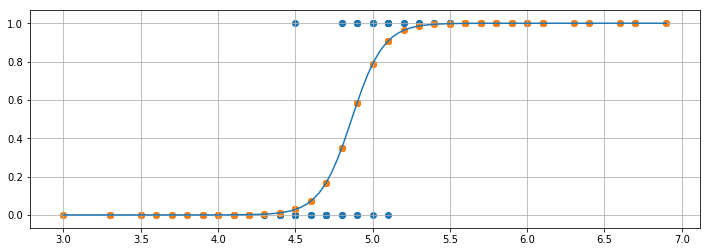

In [9]:
x_latent1 = np.linspace(min(X1), max(X1), 100)

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.scatter(X1, Y)
plt.plot(x_latent1, func1(x_latent1, -47.16056308,   9.69474387))
plt.scatter(X1, func1(X1, -47.16056308,   9.69474387))
plt.grid()
plt.show()

その確率の分布を見てみましょう。

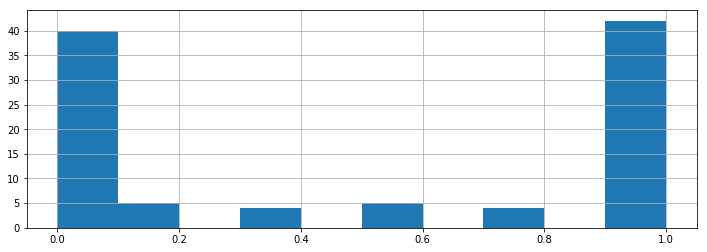

In [10]:
plt.figure(figsize=(12,4))
plt.hist(func1(X1, -47.16056308,   9.69474387))
plt.grid()
plt.show()

## 予測精度の見積もり

実際の分類（０か１か）は Y という変数に入っています。回帰して得られた値が 0.5 以上のときは１、0.5 未満の時は０に分類するとした場合、それがどのくらい正確かを計算できます。ここで、

* TP （True Positives, 真の陽性）：１と予想したものが本当に１だった
* FP （False Positives, 偽陽性）：１と予想したものが実は０だった
* FN （False Negatives, 偽陰性）：０と予想したものが実は１だった
* TN （True Negatives, 真の陰性）：０と予想したものが本当に０だった

とします。評価指標はいろいろありますが、ここでは最も単純な

Accuracy （正答率） = (TP + TN) / (TP + FP + FN + TN) を計算しましょう。

In [11]:
def confusion_table(y_pred, y_true):
    true_positives = [] # TP
    false_positives = [] # FP
    false_negatives = [] # FN
    true_negatives = [] # TN
    for y1, y2 in zip(y_pred, y_true):
        if y1 >= 0.5:
            if y2 > 0.5:
                true_positives.append(y1)
            else:
                false_positives.append(y1)
        else:
            if y2 > 0.5:
                false_negatives.append(y1)
            else:
                true_negatives.append(y1)
    return (true_positives, false_positives, false_negatives, true_negatives)

In [12]:
def show_result(TP, FP, FN, TN):
    print("Accuracy: ", len(TP + TN) / len(TP + FP + FN + TN))
    plt.figure(figsize=(12,4))
    plt.hist([TP, FP, FN, TN], label=['TP', 'FP', 'FN', 'TN'], color=['blue', 'green', 'orange', 'red'])
    plt.legend()
    plt.grid()
    plt.show()

Accuracy:  0.93


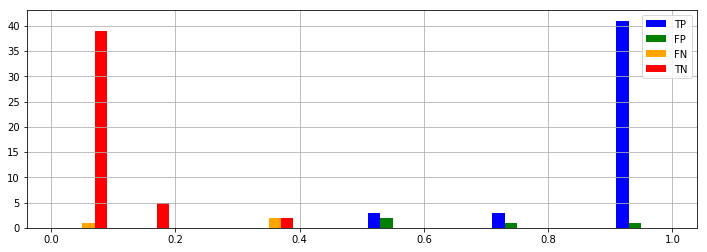

In [13]:
TP, FP, FN, TN = confusion_table(func1(X1, -47.16056308, 9.69474387), Y)
show_result(TP, FP, FN, TN)

# 説明変数が２つのシグモイド曲線に近似する

説明変数が２つの場合を試してみましょう。

In [14]:
X2 = [1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1.0, 1.3, 1.4, 
      1.0, 1.5, 1.0, 1.4, 1.3, 1.4, 1.5, 1.0, 1.5, 1.1, 
      1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7, 1.5, 1.0, 
      1.1, 1.0, 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 
      1.2, 1.4, 1.2, 1.0, 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 
      2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 
      2.0, 1.9, 2.1, 2.0, 2.4, 2.3, 1.8, 2.2, 2.3, 1.5, 
      2.3, 2.0, 2.0, 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6, 
      1.9, 2.0, 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 
      2.4, 2.3, 1.9, 2.3, 2.5, 2.3, 1.9, 2.0, 2.3, 1.8]

X = np.array([X1, X2])
X

説明変数が２つのシグモイド曲線 func2 を定義します。a と b と c を最適化することになります。

In [16]:
import numpy as np
def func2(X, a, b, c): # シグモイド近似
    f = a + b * X[0] + c * X[1]
    return 1. / (1. + np.exp(-f))

scipy.optimize.curve_fit を使って、a と b と c の最適解を得ます。scipy.optimize.curve_fit の詳細は <a href="https://qiita.com/maskot1977/items/e4f5f71200180865986e">カーブフィッティング手法 scipy.optimize.curve_fit の使い方を理解する</a>  をご参考に。

In [17]:
from scipy.optimize import curve_fit  
popt, pcov = curve_fit(func2,X,Y) # poptは最適推定値、pcovは共分散
popt

array([-34.73855674,   4.53539756,   7.68378862])

これが a と b と c の最適解になります。この最適解を用いて X をシグモイド曲線に回帰すると

In [39]:
func2(X, -34.73855674,   4.53539756,   7.68378862)

array([6.50775384e-02, 5.71307677e-02, 2.71025515e-01, 1.34765416e-03,
       8.70621930e-02, 1.28644139e-02, 2.44507030e-01, 5.62684424e-06,
       2.00985810e-02, 1.84541829e-03, 1.39380145e-05, 1.53042211e-02,
       1.34585285e-04, 6.50775384e-02, 2.19881845e-04, 1.75412448e-02,
       5.71307677e-02, 2.11803849e-04, 5.71307677e-02, 1.84377888e-04,
       7.03114052e-01, 1.34765416e-03, 2.71025515e-01, 1.47501521e-02,
       5.23352988e-03, 1.75412448e-02, 9.87363752e-02, 7.31229933e-01,
       5.71307677e-02, 1.39380145e-05, 1.17156994e-04, 3.45248338e-05,
       3.97483365e-04, 6.65083780e-01, 5.71307677e-02, 1.15555797e-01,
       1.30504519e-01, 8.21224927e-03, 2.11939802e-03, 1.34765416e-03,
       3.82539381e-03, 4.23536522e-02, 6.25445853e-04, 5.62684424e-06,
       3.33161217e-03, 1.54784801e-03, 3.33161217e-03, 5.23352988e-03,
       3.11214086e-06, 2.11939802e-03, 9.99991567e-01, 9.52173582e-01,
       9.99713144e-01, 9.88909228e-01, 9.99790606e-01, 9.99988005e-01,
      

## 回帰曲面と確率分布の図示

説明変数が２つありますので、回帰「曲線」ではなく回帰「曲面」になります。<a href="https://qiita.com/kazetof/items/c0204f197d394458022a">matplotlibで3Dプロット</a> を参考に図示してみましょう。

In [21]:
N = 1000
x1_axis = np.linspace(min(X[0]), max(X[0]), N)
x2_axis = np.linspace(min(X[1]), max(X[1]), N)
x1_grid, x2_grid = np.meshgrid(x1_axis, x2_axis)
x_mesh = np.c_[np.ravel(x1_grid), np.ravel(x2_grid)]

In [22]:
y_plot = func2(x_mesh.T, -34.73855674,   4.53539756,   7.68378862).reshape(x1_grid.shape)

/Users/kot/miniconda3/envs/py3new/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/Users/kot/miniconda3/envs/py3new/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


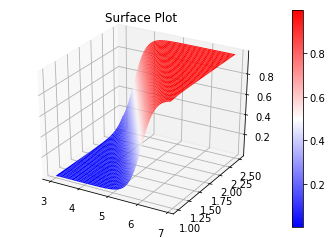

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x1_grid, x2_grid, y_plot, cmap='bwr', linewidth=0)
fig.colorbar(surf)
ax.set_title("Surface Plot")
fig.show()

ここで大事なことは、シグモイド曲線（あるいは曲面）に回帰していますが、分類問題として考えると、分類境界は「直線」（あるいは平面）であるということです。

その確率の分布と見てみましょう。

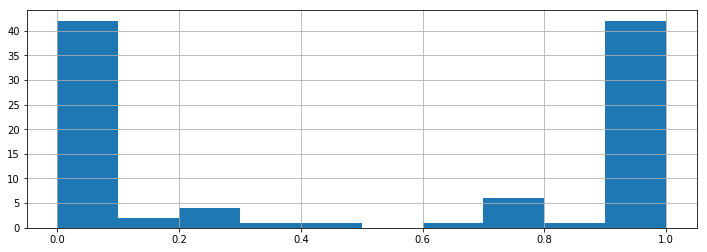

In [19]:
plt.figure(figsize=(12,4))
plt.hist(func2(X, -34.73855674,   4.53539756,   7.68378862))
plt.grid()
plt.show()

# 予測精度の見積もり

１変数のみを用いた時より少しだけ精度が向上しました。

Accuracy:  0.94


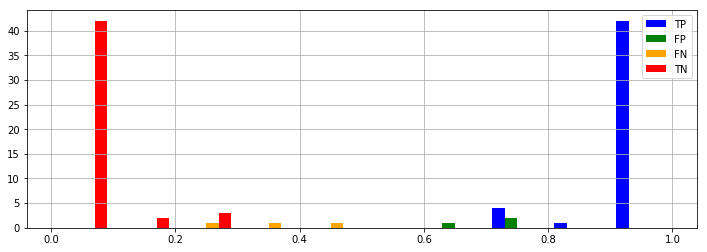

In [20]:
TP, FP, FN, TN = confusion_table(func2(X, -34.73855674,   4.53539756,   7.68378862), Y)
show_result(TP, FP, FN, TN)

# 多変数のシグモイド曲線に近似する

より多くの説明変数に対応できるように改良しましょう。

In [24]:
X3 = [7.0, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 
      5.0, 5.9, 6.0, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 
      5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6.0, 5.7, 
      5.5, 5.5, 5.8, 6.0, 5.4, 6.0, 6.7, 6.3, 5.6, 5.5, 
      5.5, 6.1, 5.8, 5.0, 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 
      6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 
      6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 
      6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 
      7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 
      6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]

X4 = [3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 
      2.0, 3.0, 2.2, 2.9, 2.9, 3.1, 3.0, 2.7, 2.2, 2.5, 
      3.2, 2.8, 2.5, 2.8, 2.9, 3.0, 2.8, 3.0, 2.9, 2.6, 
      2.4, 2.4, 2.7, 2.7, 3.0, 3.4, 3.1, 2.3, 3.0, 2.5, 
      2.6, 3.0, 2.6, 2.3, 2.7, 3.0, 2.9, 2.9, 2.5, 2.8, 
      3.3, 2.7, 3.0, 2.9, 3.0, 3.0, 2.5, 2.9, 2.5, 3.6, 
      3.2, 2.7, 3.0, 2.5, 2.8, 3.2, 3.0, 3.8, 2.6, 2.2, 
      3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3.0, 2.8, 3.0, 
      2.8, 3.8, 2.8, 2.8, 2.6, 3.0, 3.4, 3.1, 3.0, 3.1, 
      3.1, 3.1, 2.7, 3.2, 3.3, 3.0, 2.5, 3.0, 3.4, 3.0]

X = np.array([X1, X2, X3, X4])

任意の数の説明変数に対応できるよう関数を改良します。scipy.optimize.curve_fit の詳細は <a href="https://qiita.com/maskot1977/items/e4f5f71200180865986e">カーブフィッティング手法 scipy.optimize.curve_fit の使い方を理解する</a>  をご参考に。

In [27]:
import numpy as np
def func(X, *params):
    f = np.zeros_like(X[0])
    for i, param in enumerate(params):
        if i == 0:
            f = f + param
        else:
            f = f + np.array(param * X[i - 1])
    return 1. / (1. + np.exp(-f))

最初の１変数だけ使った予測

In [28]:
from scipy.optimize import curve_fit  
popt, pcov = curve_fit(func,X,Y, p0=[0, 0]) # poptは最適推定値、pcovは共分散
popt

array([-47.16139101,   9.6949171 ])

Accuracy:  0.93


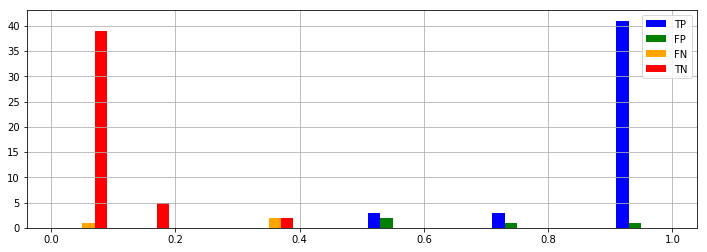

In [29]:
TP, FP, FN, TN = confusion_table(func(X, -47.16139101, 9.6949171), Y)
show_result(TP, FP, FN, TN)

最初の２変数だけ使った予測

In [30]:
from scipy.optimize import curve_fit  
popt, pcov = curve_fit(func,X,Y, p0=[0, 0, 0]) # poptは最適推定値、pcovは共分散
popt

array([-34.73582353,   4.53510012,   7.68301933])

Accuracy:  0.94


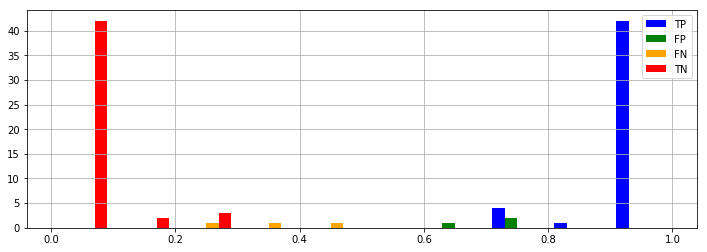

In [31]:
TP, FP, FN, TN = confusion_table(func(X, -34.73582353,   4.53510012,   7.68301933), Y)
show_result(TP, FP, FN, TN)

最初の３変数だけ使った予測

In [32]:
from scipy.optimize import curve_fit  
popt, pcov = curve_fit(func,X,Y, p0=[0, 0, 0, 0]) # poptは最適推定値、pcovは共分散
popt

array([-483.42867713,  157.66806522,  129.22275895,  -79.90984995])

Accuracy:  0.98


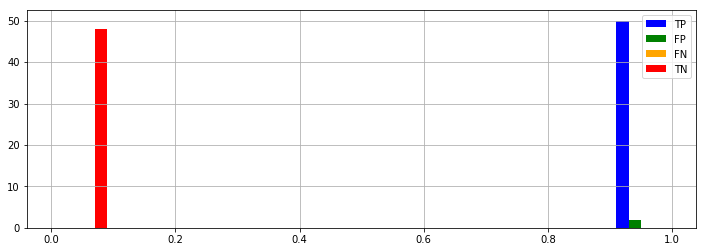

In [33]:
TP, FP, FN, TN = confusion_table(func(X, -483.42867713,  157.66806522,  129.22275895,  -79.90984995), Y)
show_result(TP, FP, FN, TN)

４変数全てを使った予測

In [34]:
from scipy.optimize import curve_fit  
popt, pcov = curve_fit(func,X,Y, p0=[0, 0, 0, 0, 0]) # poptは最適推定値、pcovは共分散
popt

array([-1331.681895  ,   338.23424537,   356.96064159,   -79.18057166,
        -149.46135291])

Accuracy:  0.99


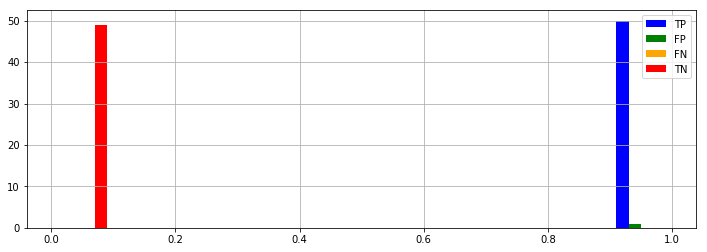

In [35]:
TP, FP, FN, TN = confusion_table(func(X, -1331.681895  ,   338.23424537,   356.96064159,   -79.18057166,
        -149.46135291), Y)
show_result(TP, FP, FN, TN)

説明変数を増やすと精度が向上したことを確認しました。

# ロジスティック回帰

以上のような計算を「ロジスティック回帰」と呼びます。ロジスティック回帰は、機械学習における「分類」手法の１つです。

ロジスティック回帰の理解を深めるには、<a href="https://qiita.com/maskot1977/items/3abe57187721258691cc">ロジスティック回帰をExcelで理解する</a> をご参照されると良いかもしれません。

また、今回はロジスティック回帰の理解と scipy.optimize.curve_fit の使用方法の理解を目的としましたが、実用的には scikit-learn という機械学習ライブラリを用いた計算が便利です。詳細は <a href="https://qiita.com/maskot1977/items/b2cfb369f60ad02887b0">機械学習で二値分類</a> をご参照ください。